In [1]:
# import all the libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.plotly as py
import plotly
from plotly.graph_objs import *
from utils import *

In [2]:
plt.style.use("seaborn")

In [3]:
# load dataframe
rent = pd.read_csv('OPENDATA_RENTAL_ZONE_CALL_A_BIKE.csv')

In [4]:
# show first 5 rows from dataset
rent.head()

,RENTAL_ZONE_HAL_ID,RENTAL_ZONE_HAL_SRC,NAME,CODE,TYPE,CITY,COUNTRY,LATITUDE,LONGITUDE,POI_AIRPORT_X,POI_LONG_DISTANCE_TRAINS_X,POI_SUBURBAN_TRAINS_X,POI_UNDERGROUND_X,ACTIVE_X,COMPANY,COMPANY_GROUP
0,354,Standort,M├╝nchner Freiheit,88001308.0,normal,M├╝nchen,Deutschland,"11,586111110000000","48,161944440000000",Nein,Nein,Nein,Nein,Ja,Call a Bike,Call a Bike
1,388,Standort,Ostbahnhof,88001662.0,normal,M├╝nchen,Deutschland,"11,604444440000000","48,128611110000000",Nein,Nein,Nein,Nein,Ja,Call a Bike,Call a Bike
2,499,Standort,DB_MobilityCenter,88002897.0,normal,M├╝nchen,Deutschland,NaN,NaN,Nein,Nein,Nein,Nein,Ja,Call a Bike,Call a Bike
3,1532,Standort,Stiglmaierplatz,88006552.0,normal,M├╝nchen,Deutschland,"11,558888890000000","48,146944440000000",Nein,Nein,Nein,Nein,Ja,Call a Bike,Call a Bike
4,1559,Standort,DB_MobilityCenter,88006834.0,normal,M├╝nchen,Deutschland,"11,575277780000000","48,160277780000000",Nein,Nein,Nein,Nein,Ja,Call a Bike,Call a Bike


In [5]:
# drop columns that has null value.

rent = rent.drop(['POI_AIRPORT_X','POI_LONG_DISTANCE_TRAINS_X','POI_SUBURBAN_TRAINS_X','POI_UNDERGROUND_X'],axis=1)

In [6]:
rent.head()

,RENTAL_ZONE_HAL_ID,RENTAL_ZONE_HAL_SRC,NAME,CODE,TYPE,CITY,COUNTRY,LATITUDE,LONGITUDE,ACTIVE_X,COMPANY,COMPANY_GROUP
0,354,Standort,M├╝nchner Freiheit,88001308.0,normal,M├╝nchen,Deutschland,"11,586111110000000","48,161944440000000",Ja,Call a Bike,Call a Bike
1,388,Standort,Ostbahnhof,88001662.0,normal,M├╝nchen,Deutschland,"11,604444440000000","48,128611110000000",Ja,Call a Bike,Call a Bike
2,499,Standort,DB_MobilityCenter,88002897.0,normal,M├╝nchen,Deutschland,NaN,NaN,Ja,Call a Bike,Call a Bike
3,1532,Standort,Stiglmaierplatz,88006552.0,normal,M├╝nchen,Deutschland,"11,558888890000000","48,146944440000000",Ja,Call a Bike,Call a Bike
4,1559,Standort,DB_MobilityCenter,88006834.0,normal,M├╝nchen,Deutschland,"11,575277780000000","48,160277780000000",Ja,Call a Bike,Call a Bike


In [7]:
rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1062 entries, 0 to 1061
Data columns (total 12 columns):
RENTAL_ZONE_HAL_ID     1062 non-null int64
RENTAL_ZONE_HAL_SRC    1062 non-null object
NAME                   1062 non-null object
CODE                   1046 non-null float64
TYPE                   1062 non-null object
CITY                   1062 non-null object
COUNTRY                1062 non-null object
LATITUDE               1032 non-null object
LONGITUDE              1032 non-null object
ACTIVE_X               1062 non-null object
COMPANY                1062 non-null object
COMPANY_GROUP          1061 non-null object
dtypes: float64(1), int64(1), object(10)
memory usage: 99.6+ KB


In [8]:
# drop columns that has nan value in any row

# rent = rent.dropna(how='any')
# rent.info()

In [9]:
# for i in range(len(lat)):
#     lat[i] = '.'.join(lat[i].split(',')).rstrip('0')

In [10]:
country = rent['COUNTRY'].unique()
print(country)

['Deutschland' 'Schweiz']


In [11]:
D = rent[rent['COUNTRY']=='Deutschland']
S = rent[rent['COUNTRY']=='Schweiz']

In [12]:
city_D = D['CITY'].unique()
city_S = S['CITY'].unique()

In [13]:
city_count_D = {}
for city in city_D:
    city_count_D[city] = len(D[D['CITY']==city])
print(city_count_D)

{'L├╝beck': 1, 'Kiel': 5, 'Erlangen': 1, 'Mainz': 1, 'Freiburg': 1, 'Wiesbaden': 16, 'Baden-Baden': 7, 'Hennef': 1, 'Stuttgart': 44, 'Bremen': 1, 'Halle': 3, 'Marburg': 22, 'M├╝nchen': 88, 'Heidelberg': 1, 'Troisdorf': 3, 'Bielefeld': 1, 'Hanau': 1, 'Magdeburg': 1, 'Weimar': 1, 'Freiham': 1, 'Bamberg': 1, 'W├╝rzburg': 1, 'Kassel': 58, 'Frankfurt am Main': 323, 'Hamburg': 207, 'Flugh. Frankfurt': 2, 'K├Čln': 184, 'Warnem├╝nde': 1, 'Mannheim': 1, 'D├╝sseldorf': 1, 'Bonn': 1, 'Hannover': 1, 'Kaiserslautern': 1, 'Rostock': 1, 'G├Čttingen': 1, 'R├╝sselsheim': 8, 'G├╝tersloh': 1, 'Oberhausen': 1, 'Karlsruhe': 2, 'Aschaffenburg': 1, 'Braunschweig': 1, 'Saarbr├╝cken': 1, 'Fulda': 1, 'Darmstadt': 41, 'Ingolstadt': 1, 'Oldenburg (Oldb)': 1}


In [14]:
city_count_S = {}
for city in city_S:
    city_count_S[city] = len(S[S['CITY']==city])
print(city_count_S)

{'Winterthur': 1, 'Spiez': 1, 'G├Čschenen': 1, 'Thun': 1, 'Grindelwald': 1, 'Davos': 1, 'Zermatt': 1, 'Lausanne': 1, 'Genf': 1, 'Biel': 1, 'Chur': 1, 'Lugano': 1, 'Z├╝rich': 1, 'Interlaken': 1, 'Bellinzona': 1, 'St. Gallen': 1, 'Brigg': 1, 'Andermatt': 1, 'Sion': 1}


In [15]:
city_D_name = []
city_D_num = []
for key, val in city_count_D.items():
    city_D_name.append(key)
    city_D_num.append(val)

In [16]:
city_S_name = []
city_S_num = []
for key, val in city_count_S.items():
    city_S_name.append(key)
    city_S_num.append(val)

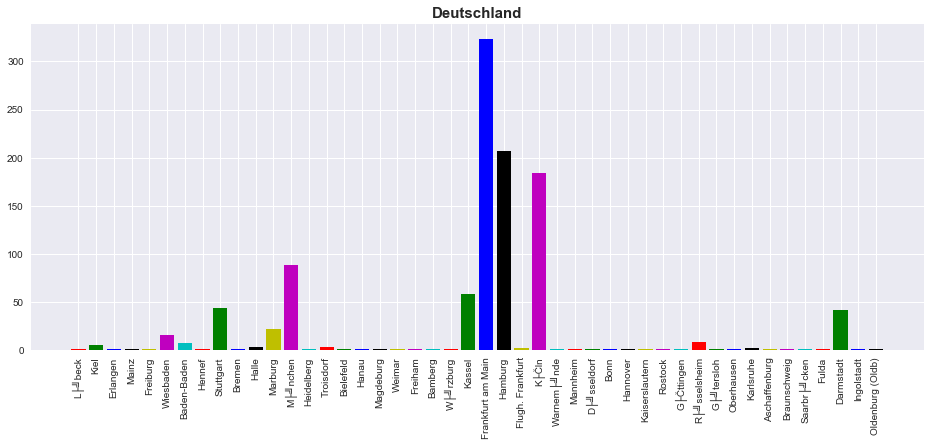

In [17]:
from matplotlib import cm
#colors = cm.hsv(city_D_num /(max(city_D_num)))
#plt.bar(range(len(y)), y, color = colors)

x_plot = np.arange(len(city_D_num))
plt.figure(figsize=(16,6))
plt.title('Deutschland', fontsize=15, fontweight='bold')
p = plt.bar(x_plot+1, city_D_num,color = 'rgbkymc')
plt.xticks(x_plot+1, city_D_name, rotation = 'vertical')
plt.show()

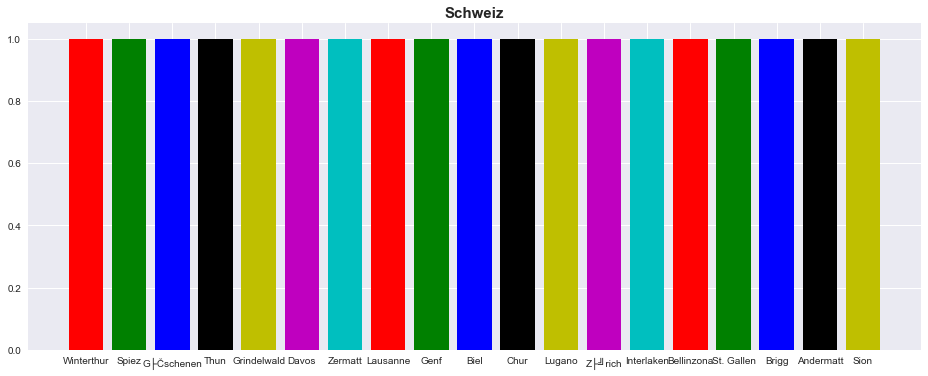

In [18]:
x_plot = np.arange(len(city_S_num))
plt.figure(figsize=(16,6))
plt.title('Schweiz', fontsize=15, fontweight='bold')
p = plt.bar(x_plot+1, city_S_num,color="rgbkymc")
plt.xticks(x_plot+1, city_S_name, rotation = 'horizontal')
plt.show()

In [19]:
D_na = D.dropna(axis=0,how='any')
D_na = D_na.reset_index(drop=True)
lat_D = D_na['LATITUDE']
lon_D = D_na['LONGITUDE']
new_lat = []
new_lon = []
for i in range(len(lat_D.index)):
    new_lat.append('.'.join(lat_D[i].split(',')).rstrip('0'))
    new_lon.append('.'.join(lon_D[i].split(',')).rstrip('0'))

In [20]:
data = Data([
    Scattermapbox(
        lat=new_lon,
        lon=new_lat,
        mode='markers',
        marker=Marker(
            color='rgb(255, 255, 0)',
            opacity=0.8,
            size=10
        )
        
    )
])

layout = Layout(
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        accesstoken=passkey,
        bearing=0,
        center=dict(
            lat=25,
            lon=11.5
        ),
        pitch=0,
        zoom=2
    ),
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='Bike')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~chinmaydasbat/0 or inside your plot.ly account where it is named 'Bike'
